In [42]:
##Loading the dataset into the Python tool for analyzing the dataset and using Descriptive Statistical Function to gather specific information
import pandas as pd
file_path = r"C:\Users\DELL\Desktop\business analytic internship cognifyz\Data_set 2 - Copy.csv"
df = pd.read_csv(file_path)
print("Dataset Info:")
df.info()
print("\nFirst 5 Rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 


Gender Column:
gender
Male      25
Female    15
Name: count, dtype: int64


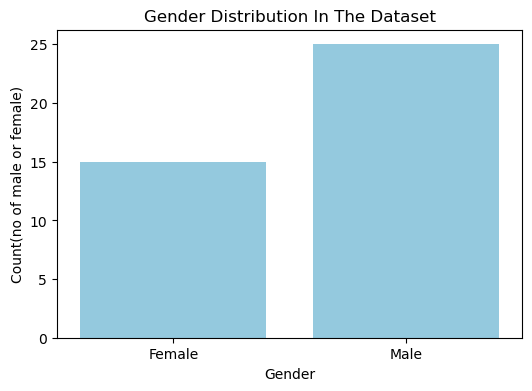

In [43]:
##Visualizing the gender distribution in the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("\nGender Column:")
print(df['gender'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df,color='skyblue')
plt.title("Gender Distribution In The Dataset")
plt.xlabel("Gender")
plt.ylabel("Count(no of male or female)")
plt.show()

In [44]:
## Getting the numerical data from the columns where numbers are used and computing Descriptive statistics for the numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
statistics = df[numerical_columns].agg(['mean', 'median', 'std'])
print("\nDescriptive Statistics for Numerical Columns:")
print(statistics)


Descriptive Statistics for Numerical Columns:
              age  Mutual_Funds  Equity_Market  Debentures  Government_Bonds  \
mean    27.800000      2.550000       3.475000    5.750000          4.650000   
median  27.000000      2.000000       4.000000    6.500000          5.000000   
std      3.560467      1.197219       1.131994    1.675617          1.369072   

        Fixed_Deposits       PPF      Gold  
mean          3.575000  2.025000  5.975000  
median        3.500000  1.000000  6.000000  
std           1.795828  1.609069  1.143263  


In [45]:
###Identify the most preferred investment avenue
most_preferred_avenue = df['Investment_Avenues'].mode()[0]
print("\nMost Preferred Investment Avenue:", most_preferred_avenue)


Most Preferred Investment Avenue: Yes


In [46]:
###Analyzing the reasons for investment choices
reason_columns = ['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']
all_reasons = df[reason_columns].values.flatten()


In [47]:
###summarizing reasons for investment choices and Counting the occurrences of each reason
reason_counts = pd.Series(all_reasons).value_counts()
print("\nSummary of Investment Reasons:")
print(reason_counts)


Summary of Investment Reasons:
Capital Appreciation    30
Assured Returns         26
Better Returns          24
Risk Free               19
Fixed Returns           18
Safe Investment         13
Fund Diversification    13
Dividend                 8
High Interest Rates      3
Tax Benefits             3
Liquidity                2
Tax Incentives           1
Name: count, dtype: int64


In [48]:
###Identifying the savings objectives and giving the count like how many of them as the same objective
print("\nSavings Objectives:")
savings_objectives = df['What are your savings objectives?'].value_counts()
print(savings_objectives)


Savings Objectives:
What are your savings objectives?
Retirement Plan    24
Health Care        13
Education           3
Name: count, dtype: int64


In [49]:
###Analyzing common sources of investment information
print("\nCommon Information Sources:")
info_sources = df['Source'].value_counts()
print(info_sources)


Common Information Sources:
Source
Financial Consultants       16
Newspapers and Magazines    14
Television                   6
Internet                     4
Name: count, dtype: int64


In [50]:
### Calculating the average investment duration by using statistical approach 
print("\nAverage Investment Duration:")
duration_mapping = {"Less than 1 year": 0.5, "1-3 years": 2, "3-5 years": 4, "More than 5 years": 6}
df['Duration_Numeric'] = df['Duration'].map(duration_mapping)
avg_duration = df['Duration_Numeric'].mean()
print(f"Average Investment Duration: {avg_duration:.2f} years")


Average Investment Duration:
Average Investment Duration: 2.98 years


In [51]:
###Summarize participants' expectations from investments
print("\nInvestment Expectations:")
investment_expectations = df['Expect'].value_counts()
print(investment_expectations)


Investment Expectations:
Expect
20%-30%    32
30%-40%     5
10%-20%     3
Name: count, dtype: int64


In [52]:
###Correlation Analysis
print("\nCorrelation Analysis:")
correlation_columns = ['age', 'Duration_Numeric']
correlation_matrix = df[correlation_columns].corr()
print(correlation_matrix)


Correlation Analysis:
                       age  Duration_Numeric
age               1.000000          0.051756
Duration_Numeric  0.051756          1.000000


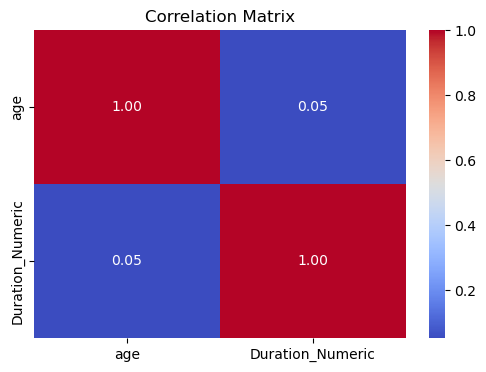

In [53]:
###Visualizing correlation with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()